In [12]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from citipy import citipy
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [13]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [14]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

628

In [15]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6fde90232665e52dcae826d1d0c62ee0


In [18]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | castro
Processing Record 2 of Set 1 | bilibino
Processing Record 3 of Set 1 | atuona
Processing Record 4 of Set 1 | georgetown
Processing Record 5 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 6 of Set 1 | ust-tarka
Processing Record 7 of Set 1 | avarua
Processing Record 8 of Set 1 | ruatoria
City not found. Skipping...
Processing Record 9 of Set 1 | namibe
Processing Record 10 of Set 1 | chokurdakh
Processing Record 11 of Set 1 | vaini
Processing Record 12 of Set 1 | carlyle
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | saint-philippe
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | victoria
Processing Record 19 of Set 1 | tiksi
Processing Record 20 of Set 1 | kapaa
Processing Record 21 of Set 1 | cidreira
Processing Record 22 of 

Processing Record 35 of Set 4 | mahebourg
Processing Record 36 of Set 4 | severo-kurilsk
Processing Record 37 of Set 4 | sorvag
City not found. Skipping...
Processing Record 38 of Set 4 | tuggurt
City not found. Skipping...
Processing Record 39 of Set 4 | cayenne
Processing Record 40 of Set 4 | acuna
City not found. Skipping...
Processing Record 41 of Set 4 | talcahuano
Processing Record 42 of Set 4 | mogocha
Processing Record 43 of Set 4 | eydhafushi
Processing Record 44 of Set 4 | wewak
Processing Record 45 of Set 4 | tidore
City not found. Skipping...
Processing Record 46 of Set 4 | jamestown
Processing Record 47 of Set 4 | krasnokholm
Processing Record 48 of Set 4 | iquitos
Processing Record 49 of Set 4 | zachagansk
City not found. Skipping...
Processing Record 50 of Set 4 | vanimo
Processing Record 1 of Set 5 | gat
Processing Record 2 of Set 5 | grindavik
Processing Record 3 of Set 5 | nuuk
Processing Record 4 of Set 5 | nata
Processing Record 5 of Set 5 | vazante
Processing Recor

Processing Record 21 of Set 8 | hobyo
Processing Record 22 of Set 8 | lata
Processing Record 23 of Set 8 | mazagao
Processing Record 24 of Set 8 | linxia
Processing Record 25 of Set 8 | allonnes
Processing Record 26 of Set 8 | nome
Processing Record 27 of Set 8 | zaton
Processing Record 28 of Set 8 | nuevo laredo
Processing Record 29 of Set 8 | naze
Processing Record 30 of Set 8 | la ronge
Processing Record 31 of Set 8 | vila velha
Processing Record 32 of Set 8 | faya
Processing Record 33 of Set 8 | hidalgotitlan
Processing Record 34 of Set 8 | mount gambier
Processing Record 35 of Set 8 | caucaia
Processing Record 36 of Set 8 | svetlyy
Processing Record 37 of Set 8 | tikhvin
Processing Record 38 of Set 8 | charlottesville
Processing Record 39 of Set 8 | lazaro cardenas
Processing Record 40 of Set 8 | tautira
Processing Record 41 of Set 8 | obihiro
Processing Record 42 of Set 8 | kenai
Processing Record 43 of Set 8 | port blair
Processing Record 44 of Set 8 | sainte-suzanne
Processing 

Processing Record 8 of Set 12 | hokitika
Processing Record 9 of Set 12 | sibolga
Processing Record 10 of Set 12 | cape canaveral
Processing Record 11 of Set 12 | lasa
Processing Record 12 of Set 12 | karla
Processing Record 13 of Set 12 | cap-aux-meules
Processing Record 14 of Set 12 | tamworth
Processing Record 15 of Set 12 | igarka
Processing Record 16 of Set 12 | charcas
Processing Record 17 of Set 12 | umm kaddadah
Processing Record 18 of Set 12 | sao desiderio
Processing Record 19 of Set 12 | kisangani
Processing Record 20 of Set 12 | orgtrud
Processing Record 21 of Set 12 | frankfort
Processing Record 22 of Set 12 | oranjemund
Processing Record 23 of Set 12 | iskateley
Processing Record 24 of Set 12 | portland
Processing Record 25 of Set 12 | progreso
Processing Record 26 of Set 12 | mae sai
Processing Record 27 of Set 12 | rajpur
Processing Record 28 of Set 12 | bardiyah
Processing Record 29 of Set 12 | dalby
Processing Record 30 of Set 12 | magdagachi
Processing Record 31 of Se

In [19]:
len(city_data)

565

In [20]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Castro,-24.7911,-50.0119,72.72,64,5,10.18,BR,2021-05-29 19:11:12
1,Bilibino,68.0546,166.4372,46.42,54,89,2.26,RU,2021-05-29 19:16:08
2,Atuona,-9.8000,-139.0333,78.71,71,3,10.58,PF,2021-05-29 19:12:27
3,Georgetown,5.4112,100.3354,84.13,83,20,5.01,MY,2021-05-29 19:11:21
4,Ust-Tarka,55.5672,75.7050,62.35,49,74,10.49,RU,2021-05-29 19:16:08
5,Avarua,-21.2078,-159.7750,75.25,64,17,4.61,CK,2021-05-29 19:16:09
6,Namibe,-15.1961,12.1522,72.75,77,1,5.66,AO,2021-05-29 19:16:09
7,Chokurdakh,70.6333,147.9167,49.46,50,9,10.02,RU,2021-05-29 19:16:09
8,Vaini,-21.2000,-175.2000,73.56,94,75,1.14,TO,2021-05-29 19:16:10
9,Carlyle,38.6103,-89.3726,60.39,69,68,1.01,US,2021-05-29 19:15:37


In [22]:
new_column_order = ["City", "Country", "Date","Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Castro,BR,2021-05-29 19:11:12,-24.7911,-50.0119,72.72,64,5,10.18
1,Bilibino,RU,2021-05-29 19:16:08,68.0546,166.4372,46.42,54,89,2.26
2,Atuona,PF,2021-05-29 19:12:27,-9.8000,-139.0333,78.71,71,3,10.58
3,Georgetown,MY,2021-05-29 19:11:21,5.4112,100.3354,84.13,83,20,5.01
4,Ust-Tarka,RU,2021-05-29 19:16:08,55.5672,75.7050,62.35,49,74,10.49
5,Avarua,CK,2021-05-29 19:16:09,-21.2078,-159.7750,75.25,64,17,4.61
6,Namibe,AO,2021-05-29 19:16:09,-15.1961,12.1522,72.75,77,1,5.66
7,Chokurdakh,RU,2021-05-29 19:16:09,70.6333,147.9167,49.46,50,9,10.02
8,Vaini,TO,2021-05-29 19:16:10,-21.2000,-175.2000,73.56,94,75,1.14
9,Carlyle,US,2021-05-29 19:15:37,38.6103,-89.3726,60.39,69,68,1.01


In [24]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [25]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

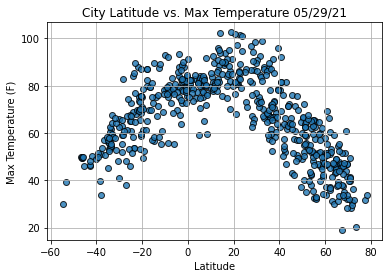

In [37]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

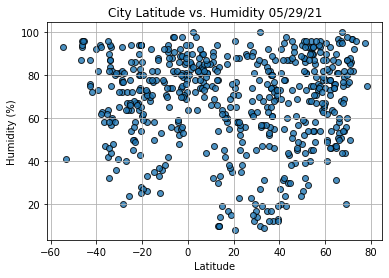

In [38]:
# Build the scatter plot for latitude vs. Humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

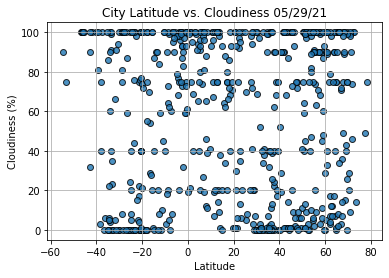

In [39]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

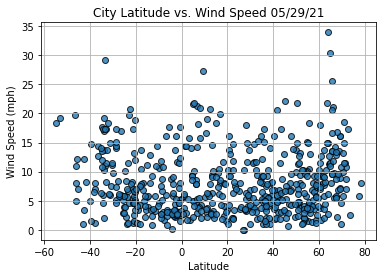

In [41]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [60]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [61]:
index13 = city_data_df.loc[13]
index13

City                    Busselton
Country                        AU
Date          2021-05-29 19:15:03
Lat                        -33.65
Lng                       115.333
Max Temp                    54.09
Humidity                       93
Cloudiness                     91
Wind Speed                  11.03
Name: 13, dtype: object

In [62]:
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3       True
4       True
       ...  
560     True
561     True
562     True
563    False
564     True
Name: Lat, Length: 565, dtype: bool

In [63]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

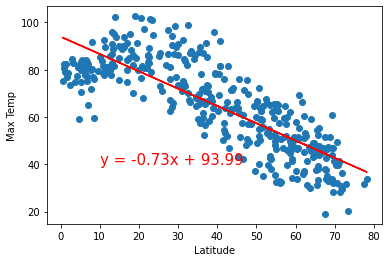

In [64]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature", 'Max Temp',(10,40))

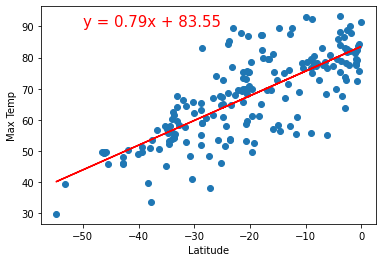

In [65]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

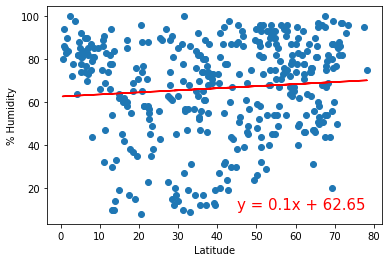

In [66]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(45,10))

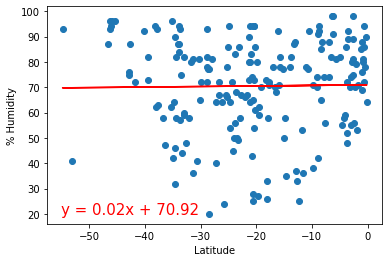

In [67]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-55,20))

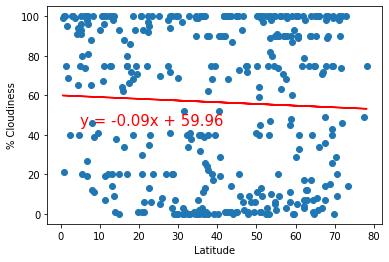

In [69]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(5,45))

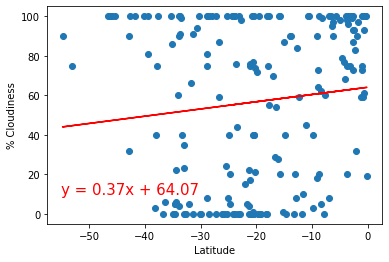

In [71]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-55,10))

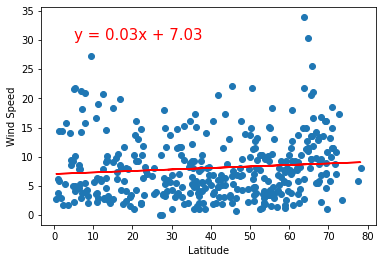

In [73]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(5, 30))

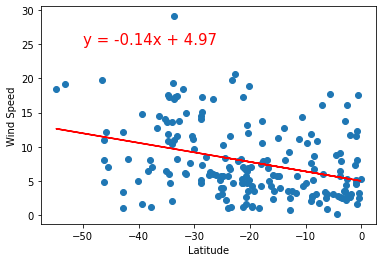

In [76]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,25))